<a href="https://colab.research.google.com/github/LauraBMueller/LauraBMueller/blob/main/Thesis_LauraBMueller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplementary Materials: Data Analysis

This colab notebook is part of the Bachelor-Thesis titled "XYZ", submitted by Laura B. Mueller, on September 28, 2024, to the Chair of Digital Health, Faculty VII, University of Bayreuth.
As mentioned in the Methods Chapter, this script was used to analyse the data and perform descriptive statistics and and test hypotheses. The data used for the analyses below was preprocessed in Excel, whereby missing values were replaced using linear interpolation.

## Prepare Analysis by importing necessary libraries and files

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, wilcoxon

# Import consolidated and cleaned data file from Excel
file_path = '/content/Preprocessed_Data.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

   ParticipantID  BGL_baseline  BGL_15  BGL_30  BGL_45  BGL_60  BGL_90  \
0              1            80     130     147     138     146     197   
1              2            86     126      98      99      96      93   
2              3            89     125     152     178     160     163   
3              4           111     141     156     111     182     153   
4              5           100     119     170     133     135     140   

   BGL_120  BGL_150  BGL_180  ...  MVC_Grip Strength  BI-ADL_total  \
0      184      166      129  ...             110.00            20   
1       87       85       81  ...             250.00            20   
2      101       76      104  ...             176.67            20   
3      125      115      102  ...             160.00            20   
4      120      107       87  ...             496.66            20   

   MoCA_total  Age  Biological Sex  Meal Duration  Preexisting Conditions  \
0          27   37            Male             10        

## Descriptive Statistics

In [ ]:
# Generate descriptive statistics for all numerical columns
descriptive_stats = data.describe()

# Print the summary statistics
print("Descriptive Statistics for Participants:\n", descriptive_stats)

# Save the descriptive statistics to an Excel file
output_file = '/content/descriptive_stats.xlsx'
descriptive_stats.to_excel(output_file)
print(f"Descriptive statistics saved to {output_file}") #Confirmation for succesful export

Descriptive Statistics for Participants:
        ParticipantID  BGL_baseline      BGL_15      BGL_30      BGL_45  \
count       7.000000      7.000000    7.000000    7.000000    7.000000   
mean        4.000000     95.142857  124.571429  143.285714  132.571429   
std         2.160247     10.730464   10.937049   24.108880   24.945655   
min         1.000000     80.000000  105.000000   98.000000   99.000000   
25%         2.500000     87.500000  122.000000  136.000000  120.500000   
50%         4.000000     97.000000  126.000000  152.000000  133.000000   
75%         5.500000    101.500000  128.000000  155.500000  138.500000   
max         7.000000    111.000000  141.000000  170.000000  178.000000   

           BGL_60      BGL_90     BGL_120     BGL_150     BGL_180  ...  \
count    7.000000    7.000000    7.000000    7.000000    7.000000  ...   
mean   137.714286  135.000000  121.285714  111.857143  104.714286  ...   
std     29.668807   39.298007   32.066152   29.031182   16.770155  ..

## Comparisons between Subjects


### Blood Glucose Levels

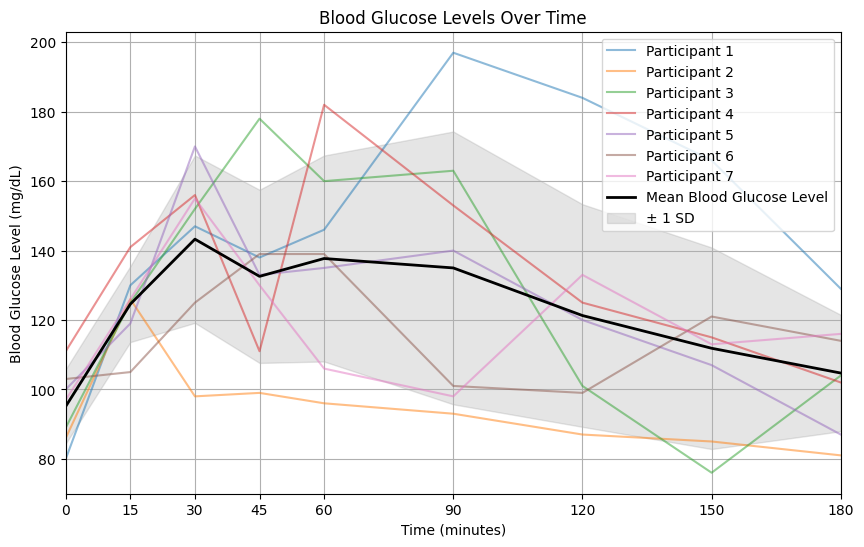

In [14]:
# Create an array 'time' to store the blood glucose measurement time points
# The array starts at baseline (time = 0) and extends up to 180 minutes post-consumption, representing the actual time intervals at which blood glucose levels were measured.
time = [0, 15, 30, 45, 60, 90, 120, 150, 180]

# Extract Blood Glucose Level Measuremeent columns from 'data'
blood_glucose_cols = ['BGL_baseline', 'BGL_15', 'BGL_30', 'BGL_45', 'BGL_60', 'BGL_90', 'BGL_120', 'BGL_150', 'BGL_180']
blood_glucose_data = data[blood_glucose_cols]

# Transpose the data to have timepoints along rows (needed for plotting)
blood_glucose_data_T = blood_glucose_data.T

# Plot blood glucose levels for all participants
plt.figure(figsize=(10, 6))

# Plot each participant's data
for i in range(7):  # Assuming 7 participants
    plt.plot(time, blood_glucose_data.iloc[i], label=f'Participant {i+1}', alpha=0.5)

# Calculate the mean and standard deviation for each time point
mean_glucose = blood_glucose_data.mean(axis=0)
std_glucose = blood_glucose_data.std(axis=0)

# Plot the mean curve
plt.plot(time, mean_glucose, label='Mean Blood Glucose Level', color='black', linewidth=2)

# Plot the standard deviation as shaded areas
plt.fill_between(time, mean_glucose - std_glucose, mean_glucose + std_glucose, color='gray', alpha=0.2, label='± 1 SD')

# Add labels and a legend
plt.title('Blood Glucose Levels Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.xticks(time)  # Set the x-axis ticks to match the exact time points
plt.xlim(0, 180)  # Set the x-axis limits to match the time range
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

iAUC and PeakAUC

<ipython-input-35-cf99b5b67d21>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  baseline = glucose_levels[0]
<ipython-input-35-cf99b5b67d21>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  baseline = glucose_levels[0]
<ipython-input-35-cf99b5b67d21>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  baseline = glucose_levels[0]
<ipython-input-35-cf99b5b67d21>:15: FutureWarning: Series.__getitem__ treating keys as positions is dep

               iAUC       PeakAUC
count      7.000000      7.000000
mean    5451.428571   5997.857143
std     4212.849604   3764.364275
min     1440.000000   1590.000000
25%     3146.250000   3795.000000
50%     4522.500000   5265.000000
75%     5925.000000   7237.500000
max    14055.000000  13065.000000


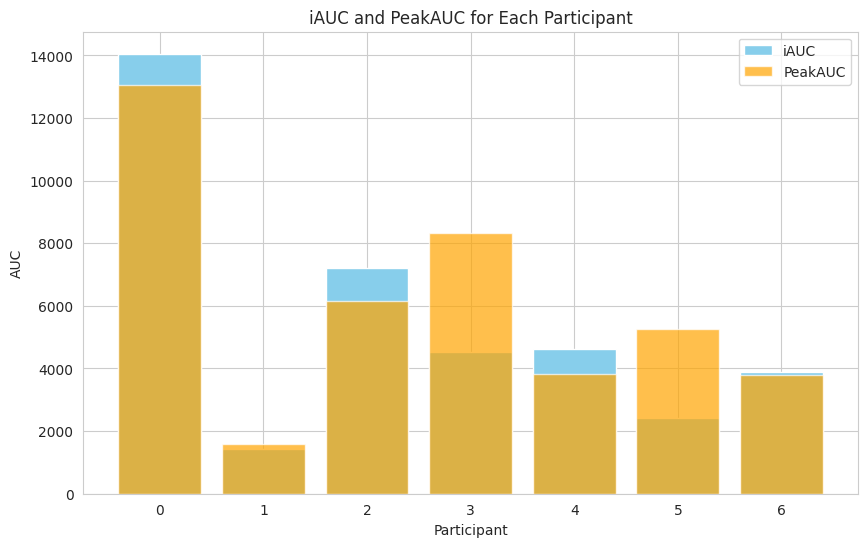

In [35]:
from scipy import integrate

# Extract blood glucose columns and participant ID
blood_glucose_cols = ['BGL_baseline', 'BGL_15', 'BGL_30', 'BGL_45', 'BGL_60', 'BGL_90', 'BGL_120', 'BGL_150', 'BGL_180']
blood_glucose_data = data[blood_glucose_cols]

# Time array representing each measurement point
time = np.array([0, 15, 30, 45, 60, 90, 120, 150, 180])

## iAUC

# Function to calculate iAUC for a single participant
def calculate_iAUC(glucose_levels, time_points):
    # Calculate the difference between each time point and the baseline
    baseline = glucose_levels[0]
    incremental_levels = glucose_levels - baseline

    # Set negative values to zero (since iAUC focuses on increments)
    incremental_levels[incremental_levels < 0] = 0

    # Calculate iAUC using the trapezoidal rule
    auc = np.trapz(incremental_levels, time_points)
    return auc

# Apply the function to each participant
data['iAUC'] = blood_glucose_data.apply(lambda row: calculate_iAUC(row, time), axis=1)

## PeakAUC

def calculate_PeakAUC(glucose_levels, time_points):
    # Find the index of the peak glucose level
    peak_index = np.argmax(glucose_levels)

    # Get the time points and glucose levels up to and including the peak
    peak_time_points = time_points[:peak_index + 1]
    peak_glucose_levels = glucose_levels[:peak_index + 1]

    # Calculate PeakAUC using the trapezoidal rule
    peak_auc = np.trapz(peak_glucose_levels, peak_time_points)
    return peak_auc

# Apply the function to each participant
data['PeakAUC'] = blood_glucose_data.apply(lambda row: calculate_PeakAUC(row, time), axis=1)


## Print and Combine iAUC and PeakAUC
print(data[['iAUC', 'PeakAUC']].describe())

plt.figure(figsize=(10,6))

# Plot iAUC for each participant
plt.bar(data.index, data['iAUC'], color='skyblue', label='iAUC')

# Plot PeakAUC for each participant
plt.bar(data.index, data['PeakAUC'], color='orange', label='PeakAUC', alpha=0.7)

plt.title('iAUC and PeakAUC for Each Participant')
plt.xlabel('Participant')
plt.ylabel('AUC')
plt.legend()
plt.show()

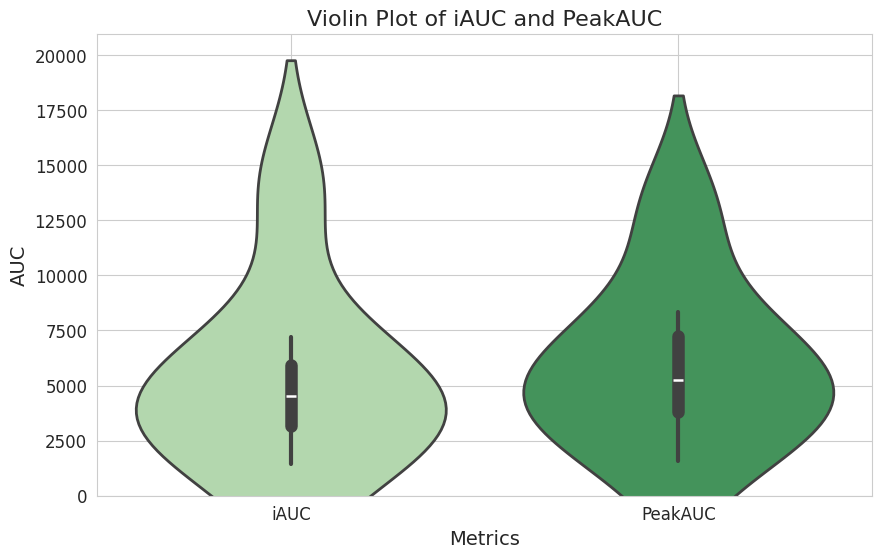

In [51]:
## Violin PLots for iAUC and PeakAUC
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['iAUC', 'PeakAUC']], palette='Greens', inner='box', linewidth=2)
plt.title('Violin Plot of iAUC and PeakAUC', fontsize=16)
plt.ylabel('AUC', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
#plt.ylim(0)
plt.show()

### Vital Signs

Heart Rate

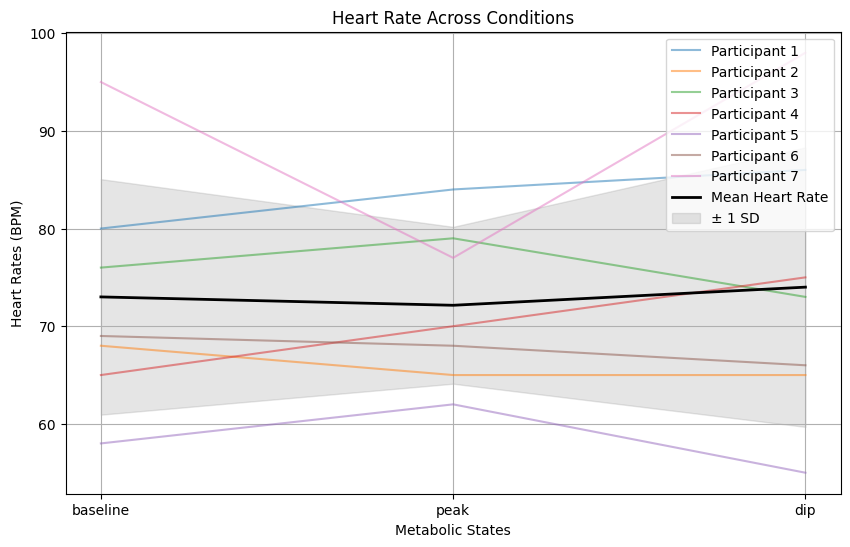

In [18]:
# Create an array 'metabolic_state' to store the metabolic states, starting at baseline (= fasted)
metabolic_state = ['baseline', 'peak', 'dip']

# Extract HR columns from 'data'
HR_cols = ['HR_baseline', 'HR_peak', 'HR_dip']
HR_data = data[HR_cols]

# Transpose the data to have timepoints along rows (needed for plotting)
HR_data_T = HR_data.T

# Plot blood glucose levels for all participants
plt.figure(figsize=(10, 6))

# Plot each participant's data
for i in range(7):  # Assuming 7 participants
    plt.plot(metabolic_state, HR_data.T[i], label=f'Participant {i+1}', alpha=0.5)

# Calculate the mean and standard deviation for each time point
mean_HR = HR_data.mean(axis=0)
std_HR = HR_data.std(axis=0)

# Plot the mean curve
plt.plot(metabolic_state, mean_HR, label='Mean Heart Rate', color='black', linewidth=2)

# Plot the standard deviation as shaded areas
plt.fill_between(metabolic_state, mean_HR - std_HR, mean_HR + std_HR, color='gray', alpha=0.2, label='± 1 SD')

# Add labels and a legend
plt.title('Heart Rate Across Conditions')
plt.xlabel('Metabolic States')
plt.ylabel('Heart Rates (BPM)')
plt.xticks(metabolic_state)  # Set the x-axis ticks to match the exact time points
#plt.xlim(0, 180)  # Set the x-axis limits to match the time range
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

HR: Violin Plot

<ipython-input-41-69c9ef41aa17>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metabolic State', y='Heart Rate', data=HR_data_melted,


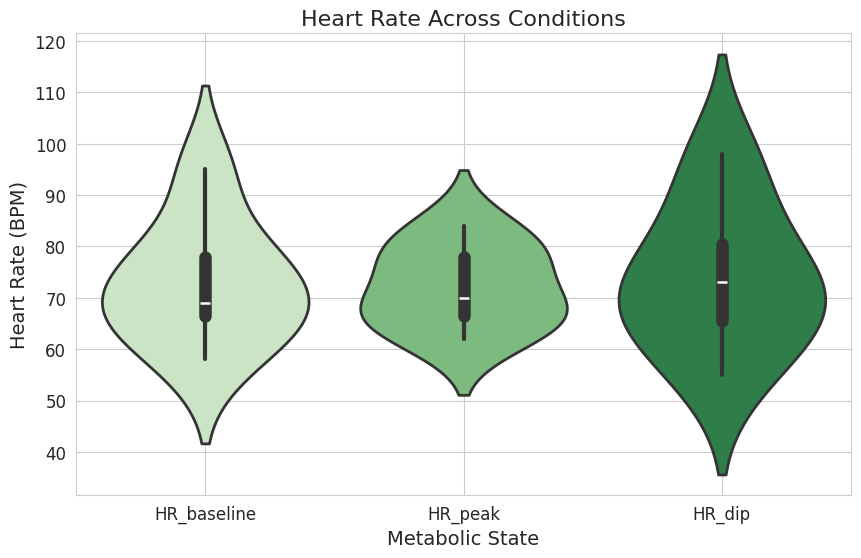

In [41]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create an array 'metabolic_state' to store the metabolic states, starting at baseline (= fasted)
metabolic_state = ['baseline', 'peak', 'dip']

# Extract HR columns from 'data'
HR_cols = ['HR_baseline', 'HR_peak', 'HR_dip']
HR_data = data[HR_cols]

# Melt the dataframe to long format for seaborn
HR_data_melted = pd.melt(HR_data, value_vars=HR_cols, var_name='Metabolic State', value_name='Heart Rate')

# Create the violin plot using seaborn, displaying IQR and median
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metabolic State', y='Heart Rate', data=HR_data_melted,
                inner='box', palette='Greens', linewidth=2)

# Customize plot aesthetics
plt.title('Heart Rate Across Conditions', fontsize=16)  # Increase title font size
plt.ylabel('Heart Rate (BPM)', fontsize=14)  # Increase y-label font size
plt.xlabel('Metabolic State', fontsize=14)  # Increase x-label font size
plt.grid(True) # Display grid lines
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.show()

<ipython-input-47-93c259faab65>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metabolic State', y='Heart Rate', data=HR_data_melted,


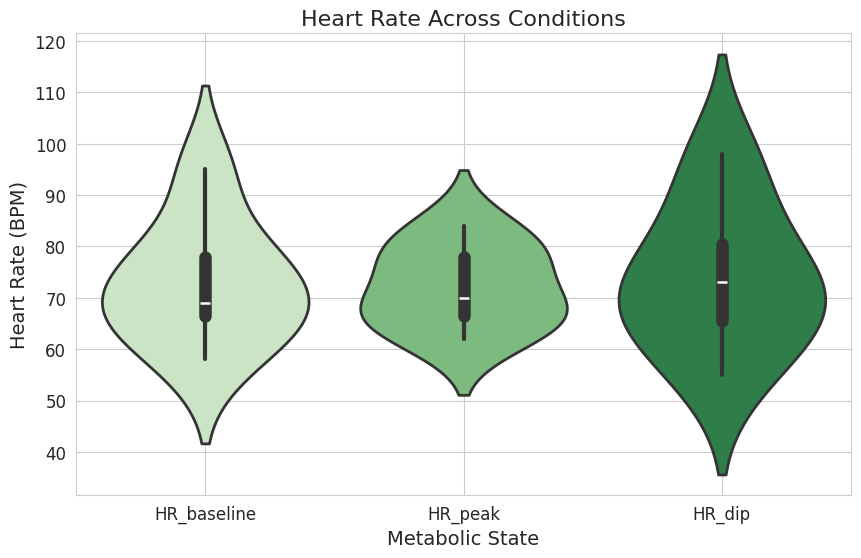

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the violin plot using seaborn, displaying IQR and median
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metabolic State', y='Heart Rate', data=HR_data_melted,
               inner='box', palette='Greens', linewidth=2)

# Customize plot aesthetics
plt.title('Heart Rate Across Conditions', fontsize=16)  # Increase title font size
plt.ylabel('Heart Rate (BPM)', fontsize=14)  # Increase y-label font size
plt.xlabel('Metabolic State', fontsize=14)  # Increase x-label font size
plt.grid(True) # Display grid lines
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.show()

Blood Pressure

<ipython-input-49-f8b440f14388>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metabolic State', y='Blood Pressure (Sys)', data=Sys_data_melted,


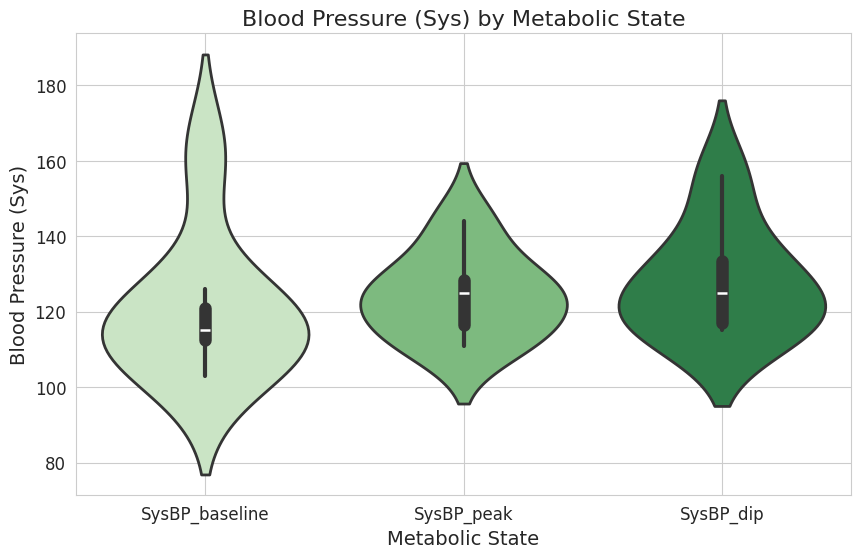

In [49]:
# Extract Systolic BP columns from 'data'
Sys_cols = ['SysBP_baseline', 'SysBP_peak', 'SysBP_dip']
Sys_data = data[Sys_cols]

# Melt the dataframe to long format for seaborn
Sys_data_melted = pd.melt(Sys_data, value_vars=Sys_cols, var_name='Metabolic State', value_name='Blood Pressure (Sys)')

# Create the violin plot, displaying IQR and median
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metabolic State', y='Blood Pressure (Sys)', data=Sys_data_melted,
               inner='box', palette='Greens', linewidth=2)

# Customize the plot
plt.title('Blood Pressure (Sys) by Metabolic State', fontsize=16)
plt.xlabel('Metabolic State', fontsize=14)
plt.ylabel('Blood Pressure (Sys)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

BP (Dia)

<ipython-input-50-3753bd59237a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metabolic State', y='Blood Pressure (Dia)', data=Dia_data_melted,


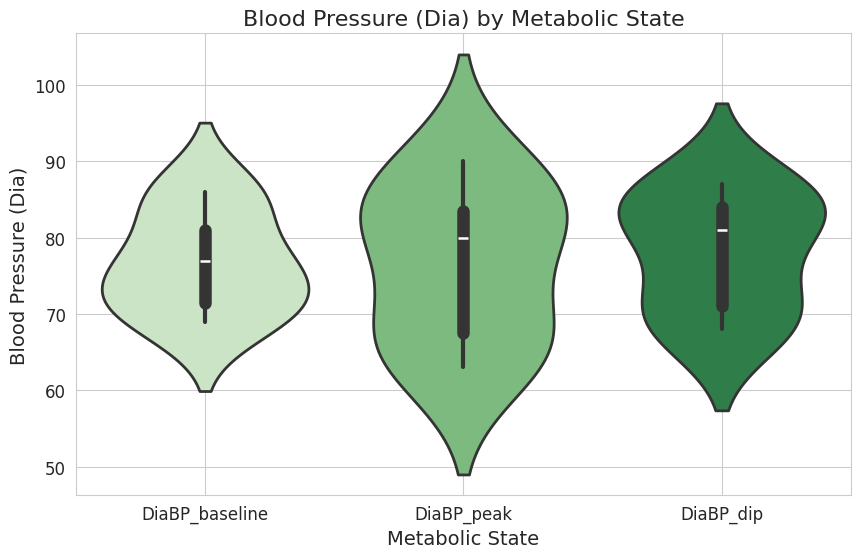

In [50]:
# Extract Diastolic BP columns from 'data'
Dia_cols = ['DiaBP_baseline', 'DiaBP_peak', 'DiaBP_dip']
Dia_data = data[Dia_cols]

# Melt the dataframe to long format for seaborn
Dia_data_melted = pd.melt(Dia_data, value_vars=Dia_cols, var_name='Metabolic State', value_name='Blood Pressure (Dia)')

# Create the violin plot, displaying IQR and median
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metabolic State', y='Blood Pressure (Dia)', data=Dia_data_melted,
               inner='box', palette='Greens', linewidth=2)

# Customize the plot
plt.title('Blood Pressure (Dia) by Metabolic State', fontsize=16)
plt.xlabel('Metabolic State', fontsize=14)
plt.ylabel('Blood Pressure (Dia)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Comparisons between metabolic states

### Data Extraction and Preprocessing

In [ ]:
# Extract the relevant columns for baseline, peak, and dip
# Replace 'Baseline', 'Peak', and 'Dip' with the actual column names from your Excel file
baseline = data['Baseline']
peak = data['Peak']
dip = data['Dip']

# Step 5: Perform the Friedman test for within-subject comparisons (non-parametric)
stat, p_value = friedmanchisquare(baseline, peak, dip)
print(f"Friedman Test statistic = {stat:.2f}, p-value = {p_value:.5f}")

# Step 6: If the Friedman test is significant, perform pairwise comparisons using Wilcoxon signed-rank test
if p_value < 0.05:
    print("Significant differences found, performing post-hoc Wilcoxon signed-rank tests:")

    # Baseline vs. Peak
    stat_b_vs_p, p_b_vs_p = wilcoxon(baseline, peak)
    print(f"Wilcoxon Baseline vs. Peak: statistic = {stat_b_vs_p:.2f}, p-value = {p_b_vs_p:.5f}")

    # Peak vs. Dip
    stat_p_vs_d, p_p_vs_d = wilcoxon(peak, dip)
    print(f"Wilcoxon Peak vs. Dip: statistic = {stat_p_vs_d:.2f}, p-value = {p_p_vs_d:.5f}")

    # Baseline vs. Dip
    stat_b_vs_d, p_b_vs_d = wilcoxon(baseline, dip)
    print(f"Wilcoxon Baseline vs. Dip: statistic = {stat_b_vs_d:.2f}, p-value = {p_b_vs_d:.5f}")

# Step 7: Save descriptive statistics and results to a new Excel file
output_file = 'path_to_your_file/descriptive_stats_and_tests.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    descriptive_stats.to_excel(writer, sheet_name='Descriptive Stats')
    # Create a summary DataFrame to save test results
    results = pd.DataFrame({
        'Test': ['Friedman Test', 'Wilcoxon Baseline vs. Peak', 'Wilcoxon Peak vs. Dip', 'Wilcoxon Baseline vs. Dip'],
        'Statistic': [stat, stat_b_vs_p, stat_p_vs_d, stat_b_vs_d],
        'p-value': [p_value, p_b_vs_p, p_p_vs_d, p_b_vs_d]
    })
    results.to_excel(writer, sheet_name='Test Results')

print(f"Results saved to {output_file}")
